In [ ]:
#Solution to lab 02 - Step 5
#Be sure the following import statement is at the top of all the code you write today
#It allows you to call the functions in the cs1.graphics library
from cs1.graphics import *

# This function draws a bullseye centered at (x,y) with the colors and radius specified
# Parameters: x, y are integers specifying the center of the bullseye, color1 and color2 are strings
# with the names of colors, and radius is an integer specifying the size of the largest circle
# Returns: None
def draw_bullseye(x, y, color1, color2, radius):
    set_color(color1)
    draw_filled_circle(x, y, radius)
  
    set_color(color2)
    draw_filled_circle(x, y, radius * 0.8)
  
    set_color(color1)
    draw_filled_circle(x, y, radius * 0.6)
  
    set_color(color2)
    draw_filled_circle(x, y, radius * 0.4)
  
    set_color(color1)
    draw_filled_circle(x, y, radius * 0.2)

def main():
    open_canvas(500, 500)
    #This sets the pencolor - you shouldn't need to change it
    set_color("black")
  
    draw_bullseye(200, 300, "purple", "yellow", 100)
    draw_bullseye(350, 150, "blue", "orange", 75)

main()


In [ ]:
#Solution to lab 02 - Step 6
#Be sure the following import statement is at the top of all the code you write today
#It allows you to call the functions in the cs1.graphics library
from cs1.graphics import *

# This function draws a bullseye centered at (x,y) with the colors and radius specified
# Parameters: x, y are integers specifying the center of the bullseye, color1 and color2 are strings
# with the names of colors, and radius is an integer specifying the size of the largest circle
# Returns: None
def draw_bullseye(x, y, color1, color2, radius):
    set_color(color1)
    draw_filled_circle(x, y, radius)
  
    set_color(color2)
    draw_filled_circle(x, y, radius * 0.8)
  
    set_color(color1)
    draw_filled_circle(x, y, radius * 0.6)
  
    set_color(color2)
    draw_filled_circle(x, y, radius * 0.4)
  
    set_color(color1)
    draw_filled_circle(x, y, radius * 0.2)

def main():
  
    open_canvas(500, 500)
    #This sets the pencolor - you shouldn't need to change it
    set_color("black")
  
    x = int(input("X: "))
    y = int(input("Y: "))
    color1 = input("Color 1: ")
    color2 = input("Color 2: ")
  
    #You didn't have to get this as input from the user, but here is an example with it as input
    radius = int(input("Radius: "))
  
    #Draws the head
    draw_bullseye(x, y, color1, color2, radius)
    x2 = x  + radius
    x3 = x - radius
    y2 = y - radius
    #Draws the ears
    draw_bullseye(x2, y2, color1, color2, radius*.5)
    draw_bullseye(x3, y2, color1, color2, radius*.5)

main()

In [ ]:
#Solution to Lab 02 - Challenge Question Solutions
from cs1.graphics import *

# This function draws a filled square at (x,y) with the color and side length specified
# Parameters: x, y are integers specifying the center of the square, square_color is a string
# with the name of a color, and side_length is an integer specifying the size of square sides
# Returns: None
def draw_square(x_center, y_center, side_length, square_color):
    set_color(square_color)
    half_side = side_length / 2
    x_corner = x_center - half_side
    y_corner = y_center - half_side
    draw_filled_rect(x_corner, y_corner, side_length, side_length)

# This function draws nested squares centered at (x,y) with the colors and side length specified
# Parameters: x, y are integers specifying the center of the nested squares, color1 and color2 are strings
# with the names of colors, and side_length is an integer specifying the size of the largest square's sides
# Returns: None
def draw_nested_squares(x, y, color1, color2, side):
    #outermost square
    draw_square(x, y, side, color1)
  
    #second square in
    side = side * 4 / 5
    draw_square(x, y, side, color2)
  
    #mid-way square
    side = side * 3 / 4
    draw_square(x, y, side, color1) 
  
    #second inmost square
    side = side * 2 / 3
    draw_square(x, y, side, color2)
  
    #inmost square
    side = side * 1 / 2
    draw_square(x, y, side, color1)

def main():
    open_canvas(500, 500)

    x = int(input("X: "))
    y = int(input("Y: "))
    color1 = input("Color 1: ")
    color2 = input("Color 2: ")
    side = int(input("Side Length: "))
  
    draw_nested_squares(x, y, color1, color2, side)

main()

# Day 6: Functions that Return Values

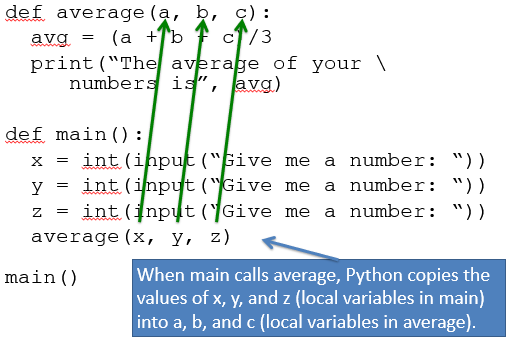

* Pretend we’re computing grades for a class that has three homework assignments and three tests.  The final grade in the class is weighted so that 75% of the final grade is from the test average and 25% is from the homework average.

* We’d like to write a program to use our average function to take the averages of the test and homework grades, and then weight those averages appropriately to compute a final course grade.

In [ ]:
def average(a, b, c):
    avg = (a + b + c)/3
    print("The average of your numbers is: ", avg)

def main():
    test1 = float(input("Give me the first test grade: "))
    test2 = float(input("Give me the second test grade: "))
    test3 = float(input("Give me the third test grade: "))
    average(test1, test2, test3)
    hw1 = float(input("Give me the first HW grade: "))
    hw2 = float(input("Give me the second HW grade: "))
    hw3 = float(input("Give me the third HW grade: "))
    average(hw1, hw2, hw3)
    # some code here to weight the test average by 0.75
    # and the hw average by 0.25 and combine them.

main()

The example code above has the following issues: 
* main can't see the "avg" variable inside of average because avg is a local variable.
* whenever we call average, a new `avg` variable is created and the old one is lost.  
* Even if we could access avg from main, there's no way we could have both the homework and test `avg` values at the same time.


__What we want to do is:__

final_grade = 0.75 * (avg from the first call to average) + 0.25 * (avg from the 2nd call)

## Return values to the rescue!

```
def function(arg1, arg2, …):
   statement
   statement
   [ more statements if desired ]
   return value  
```

__Return statements__
* When Python sees a line in a function beginning with "return," the function immediately ends, and the value is sent back to the caller.
* The return value can be a literal (string or number), or a local variable from the function

__Capturing the return value__

* Use an assignment statement to "capture" the return value. (otherwise, it is lost forever)
* `variable = function(...)` 
* When Python sees a line like above, the function is called normally.  However, when the function ends and a value is "sent back" to the caller, the value is put into the variable you specify.



In [ ]:
#Previous example fixed so it works now!

def average(a, b, c):
    avg = (a + b + c)/3
    return avg  #Changed the print statement to a return statement

def main():
    test1 = float(input("Give me the first test grade: "))
    test2 = float(input("Give me the second test grade: "))
    test3 = float(input("Give me the third test grade: "))
    test_avg = average(test1, test2, test3)
    print("Your test average is", test_avg)
  
    hw1 = float(input("Give me the first HW grade: "))
    hw2 = float(input("Give me the second HW grade: "))
    hw3 = float(input("Give me the third HW grade: "))
    hw_avg = average(hw1, hw2, hw3)
    print("Your homework average is", hw_avg)
  
    final_grade = 0.75 * test_avg + 0.25 * hw_avg
    print("Your final grade is", final_grade)

main()

In the above example, when you run the program the following happens:
* main calls average: values test1, test2, and test3 are copied into a, b, and c.
* average returns a copy of its local variable avg back to main, and the value is assigned to test_avg.
* main calls average: values hw1, hw2, and hw3 are copied into a, b, and c.
* average returns a copy of its local variable avg back to main, and the value is assigned to hw_avg.
* Final calculation is done using the local to main variables test_avg and hw_avg


__When writing functions, you should test them!__
* Make sure they work in all kinds of situations.
* Ex: Does average() work with negative numbers?  Floating point numbers?
* Without writing a main function, call your function multiple times and test it.

In [ ]:
def average(a, b, c):
    avg = (a + b + c)/3
    return avg  #Changed the print statement to a return statement


#average(-87, -60, 100)
average(90, 87.7, 99.9)

## In-Class Exercise

Write a program that computes the annual household income for a family with 2 working adults.
1. Prompt the user for their and their partner’s hourly wage, as well as the tax rate.
2. Calculate the total income for each of the adults after taxes. (Assume 40 hours/week and 52 weeks/year).
3. Output the total household income.

## Trace this Code Example
Trace the following code by hand to determine the output. Run the code to verify your solution.

In [ ]:
def foo(x, y):
    y = y + 1
    x = 2 * (y + 3)
    return x

def main():
    x = 5
    y = 4
    x = foo(x, y)
    print(x, y)

main()

## Practice
1. Write a function called `direction` that takes two float arguments, `x` and `y`. Consider an arrow  on the Cartesian plane pointing from (0,0) to (x, y). This function should return the string "NE", "SE", "SW", or "NW" depending on the direction that the arrow points. Assume `x` and `y` will never be 0. The def line will be: `def direction(x, y):`


2. Write a function called `area_of_circle` that takes in one float argument `radius`. This function should return the area of a circle with that radius ($area= \pi ∗ 𝑟^2$). The def line will be: `def area_of_circle(radius):`

In [1]:
#Write direction function here and test it


#To test your function, uncomment the following function calls one at a time, and make sure the 
#return values match the comments

#direction(50, 50) #Should return 'NE'
#direction(-50, 100) #Should return 'NW'
#direction(-25, -25) #Should return 'SW'
#direction(75, -25)   #Should return 'SE'

In [ ]:
import math
#Write the area_of_circle function here. Be sure to test it.



Please do the following:
1. Lab 3 (lab03) - due by 11:59pm (tonight)
2. Finish Project 2 (project02) - due by 11:59pm (tonight)
3. Zybooks Assignment 5 - due by 10am tomorrow 